## Method of least squares to fit circles

### Calculation of Circle Coefficients $(ABC)$

The coefficients $(A)$, $(B)$, and $(C)$ in the circle equation $Ax^2 + Bx + Cy + 1 = 0$ are determined using the least squares method. Adjusting these can change the shape, position and the radius of the circle. 

### Equation for the Jacobian Matrix $(J)$
The Jacobian matrix, denoted as $(J)$, is defined as
$$
J = \begin{bmatrix} x_1^2 + y_1^2 & x_1 & y_1 \\ \vdots & \vdots & \vdots \\ x_n^2 + y_n^2 & x_n & y_n \end{bmatrix}
$$
Where $(x_i, y_i)$ are the coordinates given, in this case focused on the posterior ends of the medial and lateral tibial plateau. Each row corresponds to a data point, with the first column representing the sum of squared coordinates, and the second and third columns representing individual coordinates. 

### Objective Function Components
Let $(K)$ be a column vector of ones, and $(J)$ be the Jacobian matrix. The objective function components are given by the residuals (error?) The objective is to minimize the residuals, which are the differences between the observed data and the values predicted by the model.
$$
\begin{align*}
K = \begin{bmatrix} 1 \\ \vdots \\ 1 \end{bmatrix} \\
\end{align*}
$$
     
### Normal Equation Components
Let $(J^T)$ be the transpose of the Jacobian matrix, $(J^TJ$) be the product of $(J^T)$ and $(J)$, and $(InvJ^TJ)$ be the inverse of $(J^TJ)$. The components are given by:
$$
\begin{align*}
J^T &= \text{Transpose of } J \\
J^TJ &= J^T \cdot J \\
InvJ^TJ &= \text{Inverse of } J^TJ
\end{align*}
$$

### Solution Vector $(ABC)$
$(A)$, $(B)$, and $(C)$ are the coefficients of the fitted circle that we aim to determine through the least squares method. The solution vector $(ABC)$ is given by:
$$
ABC = InvJ^TJ \cdot J^T \cdot K
$$

### Circle Parameters

The parameters of the fitted circle, namely $(A)$, $(B)$, and $(C)$, are extracted from $(ABC)$.
$$
\begin{align*}
A &= ABC[0] \\
B &= ABC[1] \\
C &= ABC[2]
\end{align*}
$$

### Circle Center and Radius
The center coordinates $(x_{\text{ofs}}, y_{\text{ofs}})$ and the radius $(R)$ of the fitted circle are given by:
$$
\begin{align*}
x_{\text{ofs}} &= -\frac{B}{2A} \\
y_{\text{ofs}} &= -\frac{C}{2A} \\
R &= \frac{\sqrt{4A + B^2 + C^2}}{2A}
\end{align*}
$$

Side note: If $(R < 0)$, then $(R = -R)$


Medial Condyle: MCC at (204.6886, 300.8448) Radius:  61.3206
Lateral Condyle: LCC at (272.9118, 313.1297) Radius:  50.8476
Intersection Point: 229.93931341769002 356.1958336723028


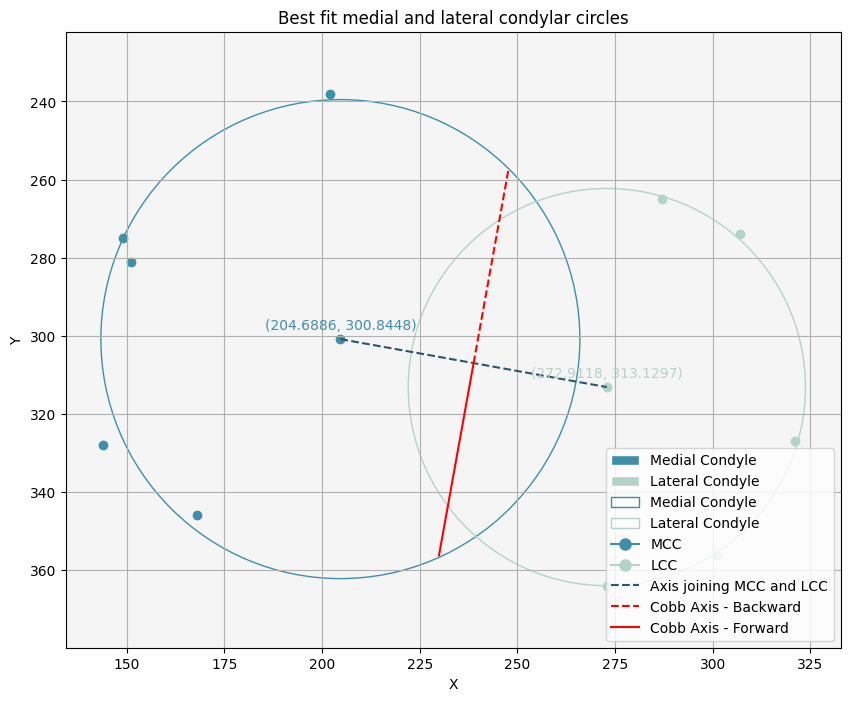

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from IPython.display import display, Math

def ls_circle(xx, yy):
    asize = np.size(xx) # number of coordinate points given, atleast 30 minimum for the Cobb's Method
    J = np.zeros((asize, 3)) # Jacobian matrix
    K = np.zeros(asize)

    for ix in range(0, asize):
        x = xx[ix]
        y = yy[ix]

        J[ix, 0] = x*x + y*y
        J[ix, 1] = x
        J[ix, 2] = y
        K[ix] = 1.0

    K = K.transpose()
    JT = J.transpose()
    JTJ = np.dot(JT, J)
    InvJTJ = np.linalg.inv(JTJ)

    # Determining the coefficients
    ABC = np.dot(InvJTJ, np.dot(JT, K))
    A = ABC[0]
    B = ABC[1]
    C = ABC[2]

    xofs = -B / (2 * A) # x-coordinate of the centre
    yofs = -C / (2 * A) # y-coordinate of the centre
    R = np.sqrt(4 * A + B*B + C*C) / (2 * A) # radius of the best fit circle
    if R < 0.0: #can't have a negative radius
        R = -R

    return xofs, yofs, R

# manually plugging in the points for now, will be automated later
if __name__ == '__main__':

    xx1 = np.array([
        202, 149, 151, 144, 168
    ])

    yy1 = np.array([
        238, 275, 281, 328, 346
    ])

    xx2 = np.array([
    287, 307, 321, 301, 273
    ])
    
    yy2 = np.array([
        265, 274, 327, 356, 364
    ])

    ans1 = ls_circle(xx1, yy1)
    ans2 = ls_circle(xx2, yy2)

    ss1 = "Medial Condyle: MCC at (%8.4f, %8.4f) Radius: %8.4f" % ans1
    ss2 = "Lateral Condyle: LCC at (%8.4f, %8.4f) Radius: %8.4f" % ans2
    print(ss1)
    print(ss2)

    # Create a larger figure
    plt.figure(figsize=(10, 8))
    plt.grid(True)
    plt.axis('equal')

    # Plot the points for both circles
    plt.scatter(xx1, yy1, label='Coordinates - Medial Condyle', color='#3f8eaa')  
    plt.scatter(xx2, yy2, label='Coordinates - Lateral Condyle', color='#b3d3c6')  

    # Plot the fitted circles
    circle1 = plt.Circle((ans1[0], ans1[1]), ans1[2], color='#3f8eaa', fill=False, label='Medial Condyle')
    circle2 = plt.Circle((ans2[0], ans2[1]), ans2[2], color='#b3d3c6', fill=False, label='Lateral Condyle')
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)

    # Scatter plot for center points
    plt.scatter(ans1[0], ans1[1], color='#3f8eaa', marker='o', label='Center 1')
    plt.scatter(ans2[0], ans2[1], color='#b3d3c6', marker='o', label='Center 2')

    # Annotate the center points with labels
    plt.annotate(f'({ans1[0]:.4f}, {ans1[1]:.4f})', (ans1[0], ans1[1]), textcoords="offset points", xytext=(0,5), ha='center', va='bottom', color='#3f8eaa')
    plt.annotate(f'({ans2[0]:.4f}, {ans2[1]:.4f})', (ans2[0], ans2[1]), textcoords="offset points", xytext=(0,5), ha='center', va='bottom', color='#b3d3c6')
    
    # Connect the centers with a line
    plt.plot([ans1[0], ans2[0]], [ans1[1], ans2[1]], color ='#2a5670', linestyle='--', label='Center Line')

    # Draw perpendicular lines
    cobb_x = (ans1[0] + ans2[0]) / 2
    cobb_y = (ans1[1] + ans2[1]) / 2

    # Calculate perpendicular vector
    perp_vector = np.array([-ans2[1] + ans1[1], ans2[0] - ans1[0]])

    # Normalize perpendicular vector
    perp_vector = perp_vector / np.linalg.norm(perp_vector)

    # Find intersection point
    intersection_x = cobb_x + perp_vector[0] * 50  # Assuming 50 is a sufficient length for intersection
    intersection_y = cobb_y + perp_vector[1] * 50
    print("Intersection Point:", intersection_x, intersection_y)

    # Draw dashed line backward
    plt.plot([cobb_x - perp_vector[0] * 50, cobb_x], [cobb_y - perp_vector[1] * 50, cobb_y], color='red', linestyle='--', label='Cobb Axis - Backward')

    # Draw solid line forward
    plt.plot([cobb_x, cobb_x + perp_vector[0] * 50], [cobb_y, cobb_y + perp_vector[1] * 50], color='red', linestyle='-', label='Cobb Axis - Forward')

    # Set labels and legend
    plt.title('Best fit medial and lateral condylar circles')
    plt.xlabel('X')
    plt.ylabel('Y')

    # Add a legend with the new line
    legend_elements = [
        Patch(facecolor='#3f8eaa', edgecolor='w', label='Medial Condyle'),
        Patch(facecolor='#b3d3c6', edgecolor='w', label='Lateral Condyle'),
        circle1,
        circle2,
        plt.Line2D([0], [0], marker='o', color='#3f8eaa', label='MCC', markersize=8),
        plt.Line2D([0], [0], marker='o', color='#b3d3c6', label='LCC', markersize=8),
        plt.Line2D([0], [0], color ='#2a5670', linestyle='--', label='Axis joining MCC and LCC'),
        plt.Line2D([0], [0], color ='red', linestyle='--', label='Cobb Axis - Backward'),
        plt.Line2D([0], [0], color ='red', linestyle='-', label='Cobb Axis - Forward')
    ]

    plt.legend(handles=legend_elements, loc='lower right')

    # Set the background color
    plt.gca().set_facecolor('#f5f5f5')

    # Invert the y-axis
    plt.gca().invert_yaxis()

    # Show the plot
    plt.show()


In [55]:
# Coefficients for y = ax + b
a = perpendicular_slope
b = -perpendicular_slope * midpoint_x + midpoint_y

# Equation of the perpendicular line in the form y = ax + b
equation_y_ax_b = f"y = {a:.4f}x + {b:.4f}"
print("Equation of the perpendicular line (y = ax + b):")
print(equation_y_ax_b)


Equation of the perpendicular line (y = ax + b):
y = -1.0000x + 545.7874


# Trying to use the weighted least squares method to see if I can set higher importance to the posterior points

**NOTE:** Should play around with the weights to see which one works the best, try on different examples and if a circle doesn't change much even with a highly weighted point, it means its not important so use it as an elimination strategy?


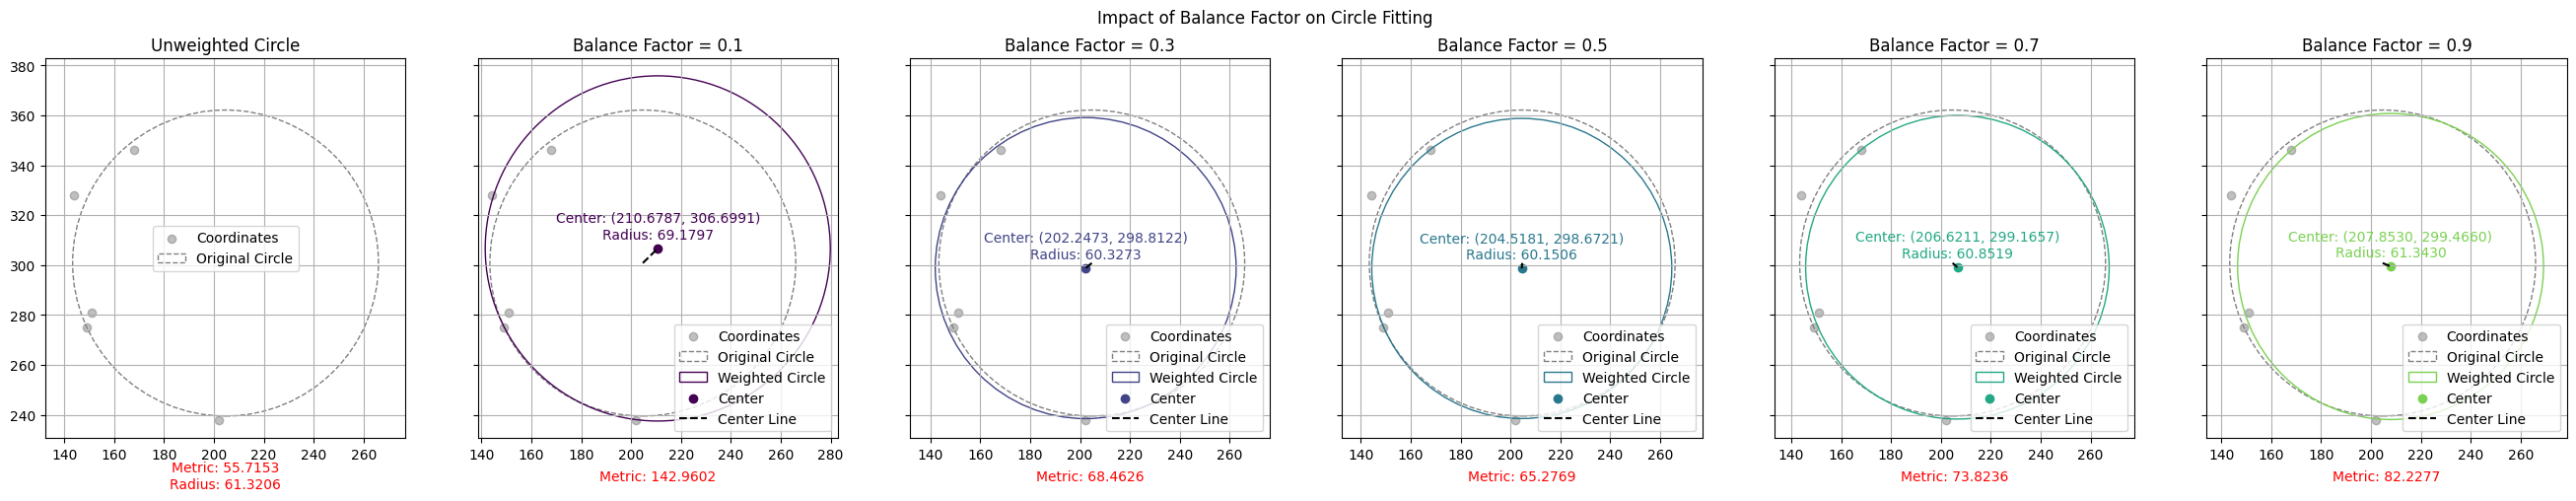

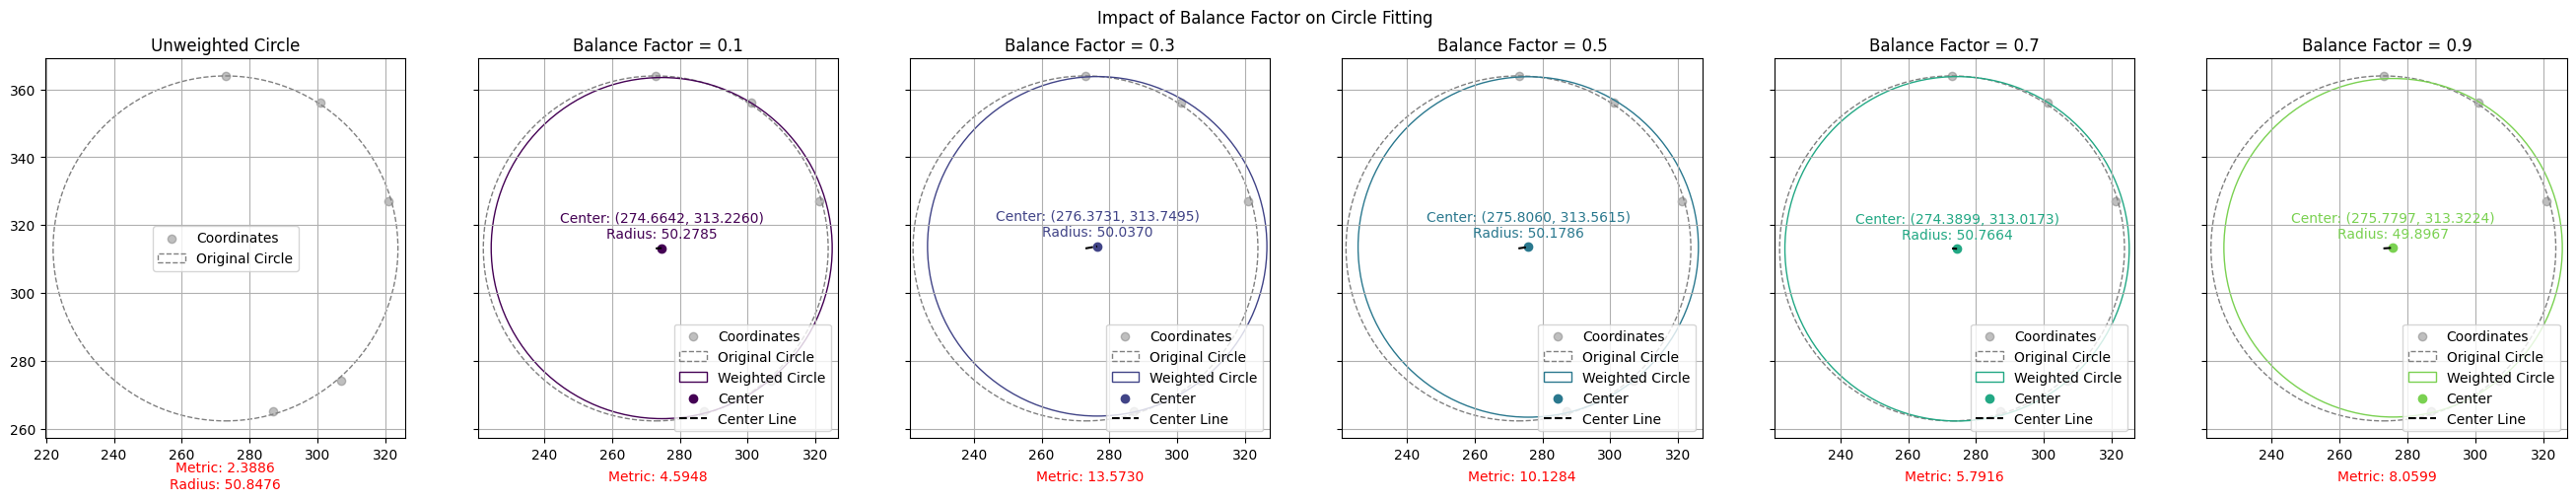

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from IPython.display import display, Math

def residual(xx, yy, circle_params):
    # Calculate the residual for each point
    return np.sqrt((xx - circle_params[0]) ** 2 + (yy - circle_params[1]) ** 2) - circle_params[2]

def weighted_ls_circle(xx, yy, weights):
    asize = np.size(xx)  # number of coordinate points given, at least 30 minimum for Cobb's Method
    J = np.zeros((asize, 3))  # Jacobian matrix
    K = np.zeros(asize)

    for ix in range(0, asize):
        x = xx[ix]
        y = yy[ix]

        J[ix, 0] = weights[ix] * (x * x + y * y)
        J[ix, 1] = weights[ix] * x
        J[ix, 2] = weights[ix] * y
        K[ix] = weights[ix]

    K = K.transpose()
    JT = J.transpose()
    JTJ = np.dot(JT, J)
    InvJTJ = np.linalg.inv(JTJ)

    # Determining the coefficients
    ABC = np.dot(InvJTJ, np.dot(JT, K))
    A = ABC[0]
    B = ABC[1]
    C = ABC[2]

    xofs = -B / (2 * A)  # x-coordinate of the center
    yofs = -C / (2 * A)  # y-coordinate of the center
    R = np.sqrt(4 * A + B * B + C * C) / (2 * A)  # radius of the best fit circle
    if R < 0.0:  # can't have a negative radius
        R = -R

    return xofs, yofs, R

def visualize_balance_factor(xx, yy, initial_weights, initial_circle_params, balance_factors, tolerance=1e-6, max_iter=100):
    num_factors = len(balance_factors)

    fig, axes = plt.subplots(1, num_factors + 1, figsize=(33, 5), sharey=True)
    fig.suptitle('Impact of Balance Factor on Circle Fitting')

    # Plot for the unweighted circle
    ax_unweighted = axes[0]
    ax_unweighted.set_title('Unweighted Circle')
    ax_unweighted.grid(True)
    ax_unweighted.axis('equal')

    # Plot the points
    ax_unweighted.scatter(xx, yy, label='Coordinates', color='gray', alpha=0.5)

    # Plot the original circle
    plot_circle(ax_unweighted, initial_circle_params, 'gray', linestyle='--', label='Original Circle')

    # Calculate and display the RSS for the unweighted circle
    residuals_unweighted = residual(xx, yy, initial_circle_params)
    metric_values_unweighted = np.sum(residuals_unweighted**2)
    ax_unweighted.text(0.5, -0.1, f'Metric: {metric_values_unweighted:.4f}\nRadius: {initial_circle_params[2]:.4f}', ha='center', va='center', transform=ax_unweighted.transAxes, color='red')
    ax_unweighted.legend()

    for i, balance_factor in enumerate(balance_factors):
        final_circle_params, weights_history = iterate_weights(xx, yy, initial_weights, initial_circle_params, balance_factor, tolerance=tolerance, max_iter=max_iter)

        ax = axes[i + 1]  # Increment index to skip the unweighted circle plot
        ax.set_title(f'Balance Factor = {balance_factor}')
        ax.grid(True)
        ax.axis('equal')

        # Plot the points
        ax.scatter(xx, yy, label='Coordinates', color='gray', alpha=0.5)

        # Plot the original circle
        plot_circle(ax, initial_circle_params, 'gray', linestyle='--', label='Original Circle')

        # Plot the weighted circle
        plot_circle(ax, final_circle_params, color=plt.cm.viridis(i / num_factors), label='Weighted Circle')

        # Scatter plot for the center point
        ax.scatter(final_circle_params[0], final_circle_params[1], color=plt.cm.viridis(i / num_factors), marker='o', label='Center')

        # Annotate the center point with label
        ax.annotate(f'Center: ({final_circle_params[0]:.4f}, {final_circle_params[1]:.4f})\nRadius: {final_circle_params[2]:.4f}',
                    (final_circle_params[0], final_circle_params[1]), textcoords="offset points", xytext=(0, 5),
                    ha='center', va='bottom', color=plt.cm.viridis(i / num_factors))

        # Connect the center with a line
        ax.plot([initial_circle_params[0], final_circle_params[0]],
                [initial_circle_params[1], final_circle_params[1]], color='black', linestyle='--', label='Center Line')

        # Display the metric (e.g., RSS) for each iteration
        residuals = residual(xx, yy, final_circle_params)
        metric_values = np.sum(residuals**2)  # RSS as an example
        ax.text(0.5, -0.1, f'Metric: {metric_values:.4f}', ha='center', va='center', transform=ax.transAxes, color='red')

        ax.legend(loc='lower right')

    plt.show()

def update_weights(xx, yy, circle_params, balance_factor):
    residuals = residual(xx, yy, circle_params)

    # Increase weights for points with negative residuals (inside the circle)
    weights = 1.0 + balance_factor * np.sign(residuals) * np.abs(residuals)

    # Higher weights to the posterior points
    weights[:len(weights)//2] *= 2.0  # Adjust as needed

    return weights

def plot_circle(ax, circle_params, color, linestyle='-', label=''):
    circle = plt.Circle((circle_params[0], circle_params[1]), circle_params[2], color=color, fill=False, linestyle=linestyle, label=label)
    ax.add_patch(circle)

def iterate_weights(xx, yy, initial_weights, initial_circle_params, balance_factor, tolerance=1e-6, max_iter=100):
    weights = initial_weights
    circle_params = initial_circle_params
    
    for i in range(max_iter):
        # Update weights based on residuals and balance factor
        weights = update_weights(xx, yy, circle_params, balance_factor)

        # Print or visualize the weights at each iteration
        #print(f"Iteration {i + 1}: {weights}")

        # Calculate new circle parameters
        new_circle_params = weighted_ls_circle(xx, yy, weights)

        # Check for convergence
        if np.linalg.norm(np.array(circle_params) - np.array(new_circle_params)) < tolerance:
            break

        # Update circle parameters for the next iteration
        circle_params = new_circle_params

    return circle_params, weights
# manually plugging in the points for now, will be automated later
if __name__ == '__main__':
    xx1 = np.array([202, 149, 151, 144, 168])
    yy1 = np.array([238, 275, 281, 328, 346])
    
    xx2 = np.array([287, 307, 321, 301, 273])
    yy2 = np.array([265, 274, 327, 356, 364])

    # Define initial weights
    initial_weights1 = np.ones_like(xx1)
    initial_weights2 = np.ones_like(xx2)

    # Define initial circle parameters
    initial_circle_params1 = weighted_ls_circle(xx1, yy1, initial_weights1)
    initial_circle_params2 = weighted_ls_circle(xx2, yy2, initial_weights2)

    # Set balance factors to visualize
    balance_factors = [0.1, 0.3, 0.5, 0.7, 0.9]

    # Visualize the impact of balance factors
    visualize_balance_factor(xx1, yy1, initial_weights1, initial_circle_params1, balance_factors)
    visualize_balance_factor(xx2, yy2, initial_weights2, initial_circle_params2, balance_factors)

    # # Create a larger figure
    # plt.figure(figsize=(10, 8))
    # ax = plt.gca()
    # ax.grid(True)
    # ax.axis('equal')

    # # Plot the points for both circles
    # ax.scatter(xx1, yy1, label='Coordinates - Medial Condyle', color='#3f8eaa')
    # ax.scatter(xx2, yy2, label='Coordinates - Lateral Condyle', color='#b3d3c6')

    # # Plot the original circles
    # plot_circle(ax, initial_circle_params1, 'gray', linestyle='--', label='Original - Medial Condyle')
    # plot_circle(ax, initial_circle_params2, 'gray', linestyle='--', label='Original - Lateral Condyle')

    # # Iterate to find optimal weights and circle parameters for both sets of points
    # final_circle_params1, final_weights1 = iterate_weights(xx1, yy1, initial_weights1, initial_circle_params1, balance_factor)
    # final_circle_params2, final_weights2 = iterate_weights(xx2, yy2, initial_weights2, initial_circle_params2, balance_factor)

    # # Plot the weighted circles
    # plot_circle(ax, final_circle_params1, '#3f8eaa', label='Weighted - Medial Condyle')
    # plot_circle(ax, final_circle_params2, '#b3d3c6', label='Weighted - Lateral Condyle')

    # ss1 = "Optimal Circle - Medial Condyle: Center at (%8.4f, %8.4f) Radius: %8.4f" % final_circle_params1
    # ss2 = "Optimal Circle - Lateral Condyle: Center at (%8.4f, %8.4f) Radius: %8.4f" % final_circle_params2
    # print(ss1)
    # print(ss2)

    # # Scatter plot for the center points
    # ax.scatter(final_circle_params1[0], final_circle_params1[1], color='#3f8eaa', marker='o', label='Center 1 - Medial Condyle')
    # ax.scatter(final_circle_params2[0], final_circle_params2[1], color='#b3d3c6', marker='o', label='Center 2 - Lateral Condyle')

    # # Annotate the center points with labels
    # ax.annotate(f'({final_circle_params1[0]:.4f}, {final_circle_params1[1]:.4f})',
    #              (final_circle_params1[0], final_circle_params1[1]), textcoords="offset points", xytext=(0, 5),
    #              ha='center', va='bottom', color='#3f8eaa')

    # ax.annotate(f'({final_circle_params2[0]:.4f}, {final_circle_params2[1]:.4f})',
    #              (final_circle_params2[0], final_circle_params2[1]), textcoords="offset points", xytext=(0, 5),
    #              ha='center', va='bottom', color='#b3d3c6')

    # # Connect the centers with a line
    # ax.plot([final_circle_params1[0], final_circle_params2[0]],
    #         [final_circle_params1[1], final_circle_params2[1]], color='#2a5670', linestyle='--', label='Center Line')

    # # Set labels and legend
    # ax.set_title('Best fit medial and lateral condylar circles')
    # ax.set_xlabel('X')
    # ax.set_ylabel('Y')

    # # Add a legend with the new line
    # legend_elements = [
    #     Patch(facecolor='#3f8eaa', edgecolor='w', label='Medial Condyle'),
    #     Patch(facecolor='#b3d3c6', edgecolor='w', label='Lateral Condyle'),
    #     plt.Line2D([0], [0], marker='o', color='#3f8eaa', label='MCC', markersize=8),
    #     plt.Line2D([0], [0], marker='o', color='#b3d3c6', label='LCC', markersize=8),
    #     plt.Line2D([0], [0], color='#2a5670', linestyle='--', label='Axis joining MCC and LCC'),
    # ]

    # ax.legend(handles=legend_elements, loc='lower right')

    # # Set the background color
    # ax.set_facecolor('#f5f5f5')

    # # Invert the y-axis
    # ax.invert_yaxis()

    # # Show the plot
    # plt.show()

    


WHAT EVEN QUANTIFIES THE BEST FIT CIRCLE